# Hierarchical Clustering

In [18]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets


## Data Preparation

In [19]:
dataset = pd.read_csv('pulsar_stars.csv')


In [20]:
print(dataset.head())
print(type(dataset))

    Mean of the integrated profile  \
0                       140.562500   
1                       102.507812   
2                       103.015625   
3                       136.750000   
4                        88.726562   

    Standard deviation of the integrated profile  \
0                                      55.683782   
1                                      58.882430   
2                                      39.341649   
3                                      57.178449   
4                                      40.672225   

    Excess kurtosis of the integrated profile  \
0                                   -0.234571   
1                                    0.465318   
2                                    0.323328   
3                                   -0.068415   
4                                    0.600866   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.699648                   3.199833   
1                        

In [40]:
ds0_7 = dataset.iloc[:, [0,1,2,3,4,5,6,7]]
print (ds0_7.head())


    Mean of the integrated profile  \
0                       140.562500   
1                       102.507812   
2                       103.015625   
3                       136.750000   
4                        88.726562   

    Standard deviation of the integrated profile  \
0                                      55.683782   
1                                      58.882430   
2                                      39.341649   
3                                      57.178449   
4                                      40.672225   

    Excess kurtosis of the integrated profile  \
0                                   -0.234571   
1                                    0.465318   
2                                    0.323328   
3                                   -0.068415   
4                                    0.600866   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.699648                   3.199833   
1                        

In [41]:
#Scaling is important. All distance based methods should scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x =preprocessing.MinMaxScaler().fit_transform(ds0_7)
#x = scaler.fit_transform(ds0_7)

In [42]:
#x = ds0_7
x

array([[0.72134164, 0.41768745, 0.16504291, ..., 0.11368057, 0.29498574,
        0.06388987],
       [0.51762787, 0.46090841, 0.23541516, ..., 0.0725243 , 0.36401483,
        0.10844339],
       [0.52034628, 0.19686832, 0.22113842, ..., 0.13918843, 0.28862387,
        0.05461031],
       ...,
       [0.60771193, 0.4751437 , 0.2046521 , ..., 0.49869934, 0.14965285,
        0.00550903],
       [0.58186609, 0.39361695, 0.20885482, ..., 0.05820853, 0.34892638,
        0.11418141],
       [0.27435072, 0.82458965, 0.33003783, ..., 0.5552546 , 0.04091771,
        0.00285542]])

## Hierarchy

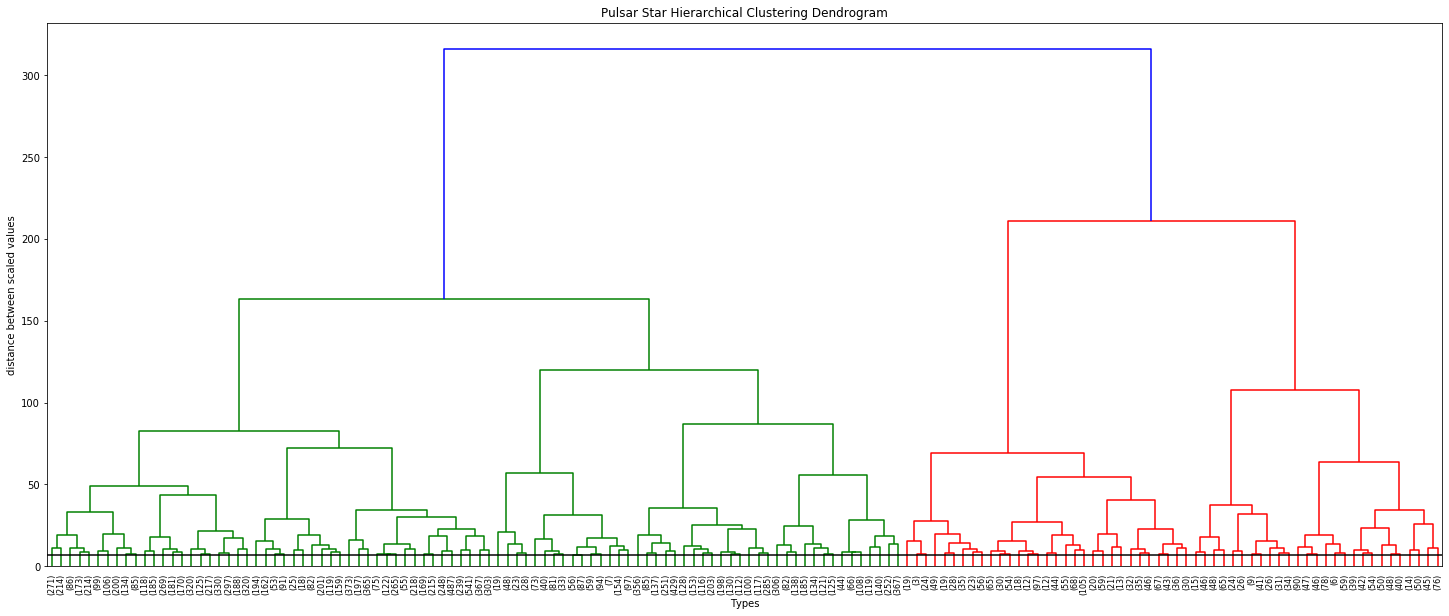

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(x, 'ward')

# set cut-off to 150 cluster merges
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Pulsar Star Hierarchical Clustering Dendrogram')
plt.xlabel('Types')
plt.ylabel('distance between scaled values')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage="ward", n_clusters=5)
clustering.fit(x);
print(clustering)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')


In [29]:
print(x.shape[0])

17898


In [30]:
print(x[0])

[ 1.14931702  1.33483164 -0.66956953 -0.400459   -0.31944026 -0.37062547
 -0.07279778 -0.28743812]


In [31]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'target_class'. 
y = label_encoder.fit_transform(dataset['target_class']) 
  

In [32]:
print(y)

[0 0 0 ... 0 0 0]


In [33]:
print(range(x.shape[0]))
print(x[0])

range(0, 17898)
[ 1.14931702  1.33483164 -0.66956953 -0.400459   -0.31944026 -0.37062547
 -0.07279778 -0.28743812]


In [47]:
# MinMax scale the data so that it fits nicely onto the 0.0->1.0 axes of the plot.
from sklearn import preprocessing
X_plot = preprocessing.MinMaxScaler().fit_transform(x)


(17898, 8)
[[0.72134164 0.41768745 0.16504291 ... 0.11368057 0.29498574 0.06388987]
 [0.51762787 0.46090841 0.23541516 ... 0.0725243  0.36401483 0.10844339]
 [0.52034628 0.19686832 0.22113842 ... 0.13918843 0.28862387 0.05461031]
 ...
 [0.60771193 0.4751437  0.2046521  ... 0.49869934 0.14965285 0.00550903]
 [0.58186609 0.39361695 0.20885482 ... 0.05820853 0.34892638 0.11418141]
 [0.27435072 0.82458965 0.33003783 ... 0.5552546  0.04091771 0.00285542]]
0.5176278700179835
0.4609084096164337
0.5176278700179834
0.4609084096164337


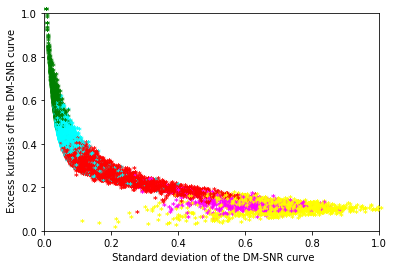

In [52]:
colours = ['magenta','cyan','yellow','red','green','blue','black']
for i in range(x.shape[0]):
    plt.text(X_plot[i, 5], X_plot[i, 6], str("*"),
             color=colours[clustering.labels_[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )
plt.xlabel(dataset.columns[5])
plt.ylabel(dataset.columns[6])
#plt.xticks([])
#plt.yticks([])
#plt.axis('off')
plt.show()

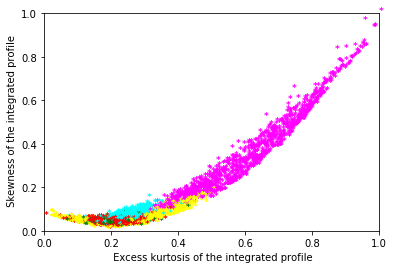

In [51]:
for i in range(x.shape[0]):
    plt.text(X_plot[i, 2], X_plot[i, 3], str("*"),
             color=colours[clustering.labels_[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )
plt.xlabel(dataset.columns[2])
plt.ylabel(dataset.columns[3])
#plt.xticks([])
#plt.yticks([])
#plt.axis('off')
plt.show()